<a href="https://colab.research.google.com/github/aryansaxena094/AAIProject/blob/main/Aryan/GoogleNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the Dataset using Kaggle API


In [1]:
!mkdir -p ~/.kaggle
!cp /content/Data/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d alessiocorrado99/animals10

!unzip animals10.zip

Streaming output truncated to the last 5000 lines.
  inflating: raw-img/ragno/OIP-MVQChNQpHiMZEVMPehrvoAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-MVdIFDAFpNyK_XCpwkDIWgHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MYY_8k5AHqMJwTCNXfH6rwHaFj.jpeg  
  inflating: raw-img/ragno/OIP-MZEVXuoMsATG8u_UuTQ6hAHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MZg0tznDRE95AMfyuutuYAHaE6.jpeg  
  inflating: raw-img/ragno/OIP-M_r9DkR2X5gP0P5-z8wPYQHaE7.jpeg  
  inflating: raw-img/ragno/OIP-M_xDUSzjlF3-w9XHCm93cgHaFF.jpeg  
  inflating: raw-img/ragno/OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg  
  inflating: raw-img/ragno/OIP-MbMksZdD7gomsC9fd6cpKgHaHJ.jpeg  
  inflating: raw-img/ragno/OIP-Md4AMcvjaHcivJqeW06wEwHaFW.jpeg  
  inflating: raw-img/ragno/OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg  
  inflating: raw-img/ragno/OIP-MgrKq05YHGXsgj1AmYIyJQHaE8.jpeg  
  inflating: raw-img/ragno/OIP-MhRGx7d8nbnHBuqrsO00EQHaFo.jpeg  
  inflating: raw-img/ragno/OIP-MiVgMXcKGQdog2KGe7i0YQHaHh.jpeg  
  inflating: raw-img/ragno/OIP-Mis0lJf3

In [2]:
# Importing the libraries
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import torch

In [3]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
full_dataset = datasets.ImageFolder('/content/raw-img', transform=transform)
print(len(full_dataset))

26179


In [4]:
train_size = int(0.8 * len(full_dataset))

validation_size = len(full_dataset) - train_size
train_dataset, validation_dataset = random_split(full_dataset, [train_size, validation_size])

In [5]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False)

In [6]:
googlenet = models.googlenet(pretrained=False)

googlenet.fc = torch.nn.Linear(googlenet.fc.in_features, 10)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
googlenet.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [7]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(googlenet.parameters(), lr=0.001, momentum=0.9)

In [10]:
# Set the number of epochs
epochs = 10

for epoch in range(epochs):
    googlenet.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = googlenet(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

    # Validation loop
    googlenet.eval()
    validation_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in validation_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = googlenet(images)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Validation Loss: {validation_loss/len(validation_loader)}, Accuracy: {100 * correct / total}%')

Epoch 1/10, Loss: 1.603596042585737
Validation Loss: 1.4494181555218812, Accuracy: 51.83346065699007%
Epoch 2/10, Loss: 1.0728343545025543
Validation Loss: 1.1447807812109225, Accuracy: 61.554621848739494%
Epoch 3/10, Loss: 0.8298806360204711
Validation Loss: 0.8412219563998827, Accuracy: 70.9702062643239%
Epoch 4/10, Loss: 0.6671360051358929
Validation Loss: 0.7415166929727648, Accuracy: 75.53475935828877%
Epoch 5/10, Loss: 0.5542601329907206
Validation Loss: 0.6946177502594343, Accuracy: 77.82658517952636%
Epoch 6/10, Loss: 0.4536122942130074
Validation Loss: 0.6651850642590988, Accuracy: 78.62872421695951%
Epoch 7/10, Loss: 0.3838143996723736
Validation Loss: 0.6112804354690924, Accuracy: 80.86325439266616%
Epoch 8/10, Loss: 0.31125263270303494
Validation Loss: 0.6507050600357172, Accuracy: 79.9083269671505%
Epoch 9/10, Loss: 0.2630701698305953
Validation Loss: 0.614613073968851, Accuracy: 80.65317035905271%
Epoch 10/10, Loss: 0.214897767036357
Validation Loss: 0.6103757260957869, A

# Analysis of Results

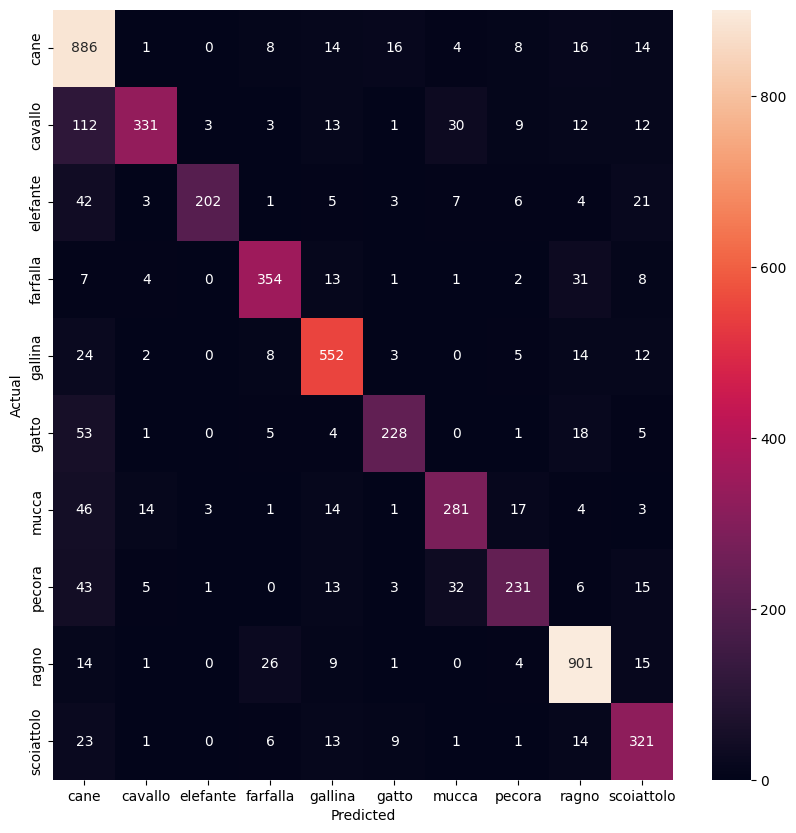

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for images, labels in validation_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = googlenet(images)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,labels.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=validation_dataset.dataset.classes,
            yticklabels=validation_dataset.dataset.classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
from sklearn.metrics import classification_report

all_preds = np.array(predlist)
all_labels = np.array(lbllist)

class_report = classification_report(all_labels, all_preds, target_names=full_dataset.classes)
print(class_report)

              precision    recall  f1-score   support

        cane       0.71      0.92      0.80       967
     cavallo       0.91      0.63      0.74       526
    elefante       0.97      0.69      0.80       294
    farfalla       0.86      0.84      0.85       421
     gallina       0.85      0.89      0.87       620
       gatto       0.86      0.72      0.78       315
       mucca       0.79      0.73      0.76       384
      pecora       0.81      0.66      0.73       349
       ragno       0.88      0.93      0.91       971
  scoiattolo       0.75      0.83      0.79       389

    accuracy                           0.82      5236
   macro avg       0.84      0.78      0.80      5236
weighted avg       0.83      0.82      0.82      5236

